In [1]:
import numpy as np
from scipy import optimize as opt
from scipy.io import loadmat
from matplotlib import pyplot as plt

In [2]:
data=loadmat('ex4data1.mat')

In [3]:
X=data['X']

In [4]:
Y=data['y']

In [5]:
m,n=X.shape

In [6]:
def Displaydata(X,m):
    _,axarr=plt.subplots(10,10,figsize=(10,10))
    for i in range(10):
        for j in range(10):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(20,20,order='F'))
            axarr[i,j].axis('off')


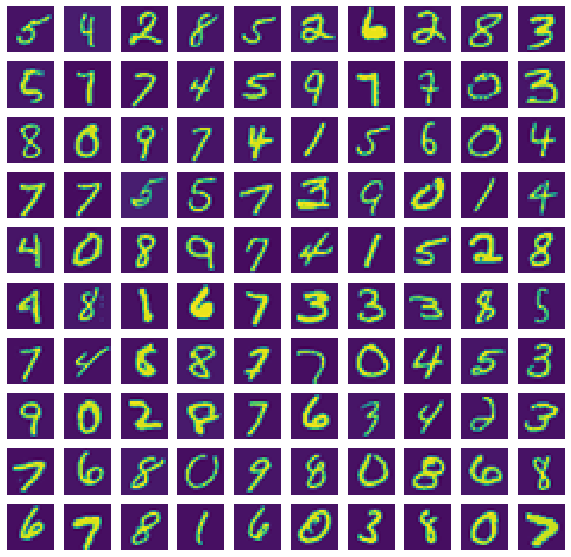

In [7]:
Displaydata(X,m)

![title](neuralnetwork.png)

In [8]:
input_layersize=400
hidden_layersize=25
num_labels=10

In [9]:
theta=loadmat('ex4weights.mat')

In [10]:
Theta1=theta['Theta1']

In [11]:
Theta2=theta['Theta2']

In [12]:
def sigmoid(z):
    temp=-z
    temp=np.exp(temp)
    temp=1+temp
    temp=1.0/temp
    return temp

In [13]:
def sigmoidGradient(z):
    temp=sigmoid(z)*(1-sigmoid(z))
    return temp

In [14]:
def nncostfunction(nnparam,input_layersize,hidden_layersize,num_labels,X,Y,lamda):
    nnparam=nnparam[:,np.newaxis]
    y=np.zeros((X.shape[0],num_labels))
    Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
    Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    a1=sigmoid(X@Theta1.T)
    predict=np.hstack((ones,a1))
    a2=sigmoid(predict@Theta2.T)
    J=0
    for c in range(1,num_labels+1):
        y[:,c-1]=np.where(Y==c,1,0)
    
    for j in range(num_labels):
        J = J + sum(-y[:,j] * np.log(a2[:,j]) - (1-y[:,j])*np.log(1-a2[:,j]))
    J=(1/m)*J
    reg=(lamda/(2*m))*(np.sum(Theta1[:,1:]**2)+np.sum(Theta2[:,1:]**2))
    J=J+reg
    delta1=np.zeros(Theta1.shape)
    delta2=np.zeros(Theta2.shape)
    for i in range(m):
        a1i=X[i,:][np.newaxis,:]#[1,401]
        a2i=predict[i,:][np.newaxis,:]#1,26
        a3i=a2[i,:][np.newaxis]#1,10
        
        d3=a3i-y[i,:]#1,10
       
        
        d2=np.multiply((Theta2.T@d3.T),sigmoidGradient(np.hstack((1,(a1i@Theta1.T).flatten())).T)[:,np.newaxis])
        
        d2=d2[1:]
        
      
        delta1=delta1+d2@a1i
        delta2=delta2+d3.T@a2i
       
  
    delta1=delta1/m
    delta2=delta2/m
    regTheta1=Theta1;
    regTheta1[:,0]=0
    delta1=delta1+((lamda)/m)*regTheta1
    regTheta2=Theta2;
    regTheta2[:,0]=0
    delta2=delta2+((lamda)/m)*regTheta2
    delta1param=delta1.reshape(delta1.shape[0]*delta1.shape[1],1)
    delta2param=delta2.reshape(delta2.shape[0]*delta2.shape[1],1)
    grad=np.vstack((delta1param,delta2param))
                                           
    
            
    return J
  

def nnGradient(nnparam,input_layersize,hidden_layersize,num_labels,X,Y,lamda):
    nnparam=nnparam[:,np.newaxis]
    y=np.zeros((X.shape[0],num_labels))
    Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
    Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    a1=sigmoid(X@Theta1.T)
    predict=np.hstack((ones,a1))
    a2=sigmoid(predict@Theta2.T)
  
    for c in range(1,num_labels+1):
        y[:,c-1]=np.where(Y==c,1,0)
    
    
    delta1=np.zeros(Theta1.shape)
    delta2=np.zeros(Theta2.shape)
    for i in range(m):
        a1i=X[i,:][np.newaxis,:]#[1,401]
        a2i=predict[i,:][np.newaxis,:]#1,26
        a3i=a2[i,:][np.newaxis]#1,10
        
        d3=a3i-y[i,:]#1,10
       
        
        d2=np.multiply((Theta2.T@d3.T),sigmoidGradient(np.hstack((1,(a1i@Theta1.T).flatten())).T)[:,np.newaxis])
        
        d2=d2[1:]
        
      
        delta1=delta1+d2@a1i
        delta2=delta2+d3.T@a2i
       
  
    delta1=delta1/m
    delta2=delta2/m
    regTheta1=Theta1;
    regTheta1[:,0]=0
    delta1=delta1+((lamda)/m)*regTheta1
    regTheta2=Theta2;
    regTheta2[:,0]=0
    delta2=delta2+((lamda)/m)*regTheta2
    delta1param=delta1.reshape(delta1.shape[0]*delta1.shape[1],1)
    delta2param=delta2.reshape(delta2.shape[0]*delta2.shape[1],1)
    grad=np.vstack((delta1param,delta2param))
    return grad
    
  

In [15]:
Theta1.shape

(25, 401)

In [16]:
Theta2.shape

(10, 26)

In [17]:
Theta1param=Theta1.reshape(Theta1.shape[0]*Theta1.shape[1],1)

In [18]:
Theta2param=Theta2.reshape(Theta2.shape[0]*Theta2.shape[1],1)

In [19]:
Theta1param.shape

(10025, 1)

In [20]:
Theta2param.shape

(260, 1)

In [21]:
nnparam=np.vstack((Theta1param,Theta2param))

In [22]:
lamda=3

In [23]:
nncostfunction(nnparam,input_layersize,hidden_layersize,num_labels,X,Y.flatten(),lamda)

0.5760512469501329

In [24]:
sigmoidGradient(np.array([-1 ,-0.5 ,0 ,0.5 ,1]))

array([0.19661193, 0.23500371, 0.25      , 0.23500371, 0.19661193])

In [25]:
def randomintialize(Lin,Lout):
    epi=(6**(1/2))/((Lin+Lout)**(1/2))
    W=np.random.rand(Lout,Lin+1)*(2*epi)-epi
    return W

In [26]:
intial_theta1=randomintialize(input_layersize,hidden_layersize)
intial_theta2=randomintialize(hidden_layersize,num_labels)

In [27]:
intial_theta1param=intial_theta1.reshape(intial_theta1.shape[0]*intial_theta1.shape[1],1)
intial_theta2param=intial_theta2.reshape(intial_theta2.shape[0]*intial_theta2.shape[1],1)

In [28]:
nnparam=np.vstack((intial_theta1param,intial_theta2param))

In [29]:
X.shape

(5000, 400)

In [30]:
temp=opt.fmin_tnc(func=nncostfunction,fprime=nnGradient,args=(400,25,10,X,Y.flatten(),1),x0=nnparam)

In [31]:
nn_param=temp[0]
Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)

In [32]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
a1=sigmoid(X@Theta1.T)
predict=np.hstack((ones,a1))
a2=sigmoid(predict@Theta2.T)
a2=np.argmax(a2,axis=1)+1
np.mean(a2[:,np.newaxis]==Y)*100

10.12

In [33]:
nncostfunction(nnparam,400,25,10,data['X'],Y.flatten(),lamda)

6.586186374309092

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

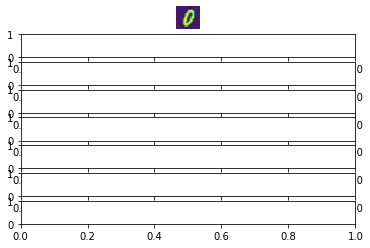

In [35]:
_,arr=plt.subplots(8)
for i,a in enumerate([2,3000,4000,1000,2000,800,4000,4999]):
    arr[i].imshow(data['X'][a,:].reshape(20,20,order='F'))
    arr[i].axis('off')
    
    predict=sigmoid(X@Theta1.T)
    predict=np.hstack((ones,predict))
    predict=sigmoid(predict@Theta2.T)
    predict=np.argmax(predict,axis=1)+1
    
    predict=0 if predict==10 else predict
    print(f"neural network prediction is{predict}")